#### Modeling and Analysis 

In [22]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import random
import matplotlib.pyplot as plt

In [8]:
# reading aisles dataset
aisles = pd.read_csv('data/aisles.csv')

In [9]:
# reading department dataset
department = pd.read_csv('data/departments.csv')

In [31]:
p = 0.01
all_orders = pd.read_csv('data/orders_train_prior.csv', header = 0, skiprows = lambda i: i>0 and random.random() > p)

In [34]:
all_orders.head(2)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,quantity
0,1,Chocolate Sandwich Cookies,61,19,2871337,15,0,1.0
1,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,3156707,2,1,1.0


In [35]:
# create basket of products per order_id
basket = (all_orders
        .groupby(['order_id', 'product_name'])['quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('order_id'))

In [13]:
basket.shape

(6181, 3722)

In [36]:
# show a subset of columns
basket.iloc[:, [0, 1, 2, 3,4, 5, 6, 7]].head()

product_name,#4 Natural Brown Coffee Filters,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,1 % Lowfat Milk
order_id,,,,,,,,
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [38]:
basket_sets = basket.applymap(encode_units)

In [39]:
basket_sets.head()

product_name,#4 Natural Brown Coffee Filters,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,1 % Lowfat Milk,1 Apple + 1 Pear Fruit Bar,1 Liter,...,Zucchini Squash,"\""Constant Comment\"" Black Tea",flings! Original Laundry Detergent Pacs,for Tots Apple White Grape Juice,o.b Super Plus Fluid Lock Tampons,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum
order_id,,,,,,,,,,,,,,,,,,,,,
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
frequent_itemsets = apriori(basket_sets, min_support = 0.01, use_colnames = True)

In [53]:
frequent_itemsets.head()

,support,itemsets
0,0.012520,(Bag of Organic Bananas)
1,0.013995,(Banana)


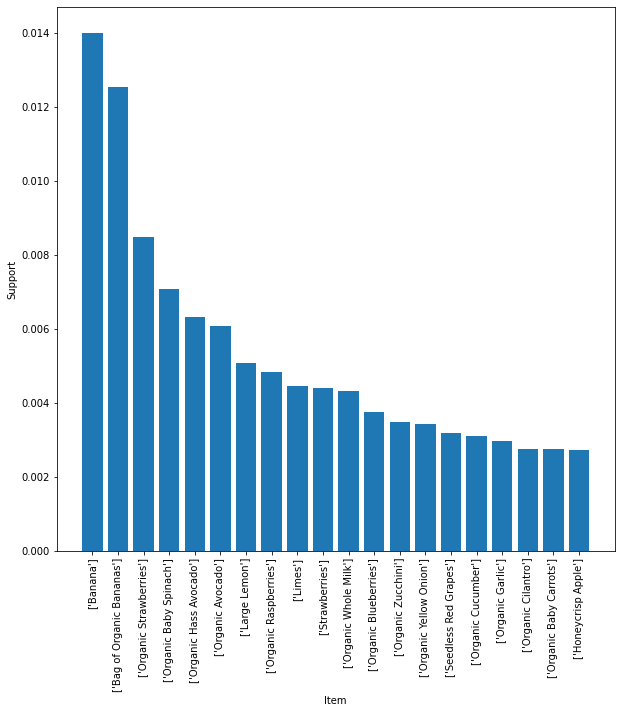

In [51]:
frequent_itemsets = apriori(basket_sets, min_support = 0.01, use_colnames = True)
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support');

In [55]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.02)

In [56]:
top_rules = rules.sort_values(‘confidence’, ascending = False)[:10]

SyntaxError: invalid character in identifier (<ipython-input-56-cc8f0d1cda17>, line 1)